# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('api.env')
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_secret_key

'agQCs5eDpzsFfkVTi7N5qek6MHI9Qt3pe5Jf0xbt'

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000
monthly_income


12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response,indent=4,sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19021293,
            "id": 1,
            "last_updated": 1650846189,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 750752361856,
                    "percent_change_1h": -0.616687376746319,
                    "percent_change_24h": -0.64756011468426,
                    "percent_change_7d": -1.06246783446613,
                    "percentage_change_1h": -0.616687376746319,
                    "percentage_change_24h": -0.64756011468426,
                    "percentage_change_7d": -1.06246783446613,
                    "price": 39317.0,
                    "volume_24h": 16831465601
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19021293,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response,indent=4,sort_keys=True))



{
    "data": {
        "1027": {
            "circulating_supply": 120515146,
            "id": 1027,
            "last_updated": 1650846182,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 352253944843,
                    "percent_change_1h": -0.741083637970266,
                    "percent_change_24h": -1.2379470792352,
                    "percent_change_7d": -3.00308118448144,
                    "percentage_change_1h": -0.741083637970266,
                    "percentage_change_24h": -1.2379470792352,
                    "percentage_change_7d": -3.00308118448144,
                    "price": 2905.76,
                    "volume_24h": 9424746574
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120515146,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
# YOUR CODE HERE
btc_price


39317.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
# Print the current price of ETH
# YOUR CODE HERE
eth_price


2905.76

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
# YOUR CODE HERE
btc_value


47180.4

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
# YOUR CODE HERE
eth_value


15400.528

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_crypto_wallet


62580.928

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE


# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(alpaca_api_key,
                      alpaca_secret_key,
                      api_version="V2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["AGG","SPY"]

# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2022-04-21",tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-21",tz = "America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
prices_tickers_df = alpaca.get_bars(tickers,
                                    timeframe,
                                    start=start_date,
                                
                                   ).df
display(prices_tickers_df)

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = prices_tickers_df[prices_tickers_df["symbol"]=="AGG"].drop("symbol",axis=1)
display(AGG)
SPY = prices_tickers_df[prices_tickers_df["symbol"]=="SPY"].drop("symbol",axis=1)
display(SPY)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_tickers_df_new = pd.concat([AGG,SPY],axis=1,keys=["AGG","SPY"])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
prices_tickers_df_new


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-21 04:00:00+00:00,103.44,103.4700,102.79,103.04,11393860,35595,103.047589,AGG
2022-04-22 04:00:00+00:00,102.73,103.1800,102.67,102.94,9152665,31498,102.925863,AGG
2022-04-21 04:00:00+00:00,448.58,450.0100,437.10,438.06,85097110,719682,442.772969,SPY
2022-04-22 04:00:00+00:00,436.94,438.0825,425.44,426.04,132156403,972064,429.813156,SPY


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-21 04:00:00+00:00,103.44,103.47,102.79,103.04,11393860,35595,103.047589
2022-04-22 04:00:00+00:00,102.73,103.18,102.67,102.94,9152665,31498,102.925863


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-21 04:00:00+00:00,448.58,450.0100,437.10,438.06,85097110,719682,442.772969
2022-04-22 04:00:00+00:00,436.94,438.0825,425.44,426.04,132156403,972064,429.813156


AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-04-21 04:00:00+00:00  103.44  103.47  102.79  103.04  11393860   
2022-04-22 04:00:00+00:00  102.73  103.18  102.67  102.94   9152665   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2022-04-21 04:00:00+00:00       35595  103.047589  448.58  450.0100  437.10   
2022-04-22 04:00:00+00:00       31498  102.925863  436.94  438.0825  425.44   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-04-21 04:00:00+00:00  438.06   85097110      719682  442.772969  
2022-04-22 04:00:00+00:00  426.04  132156403      972064  429.813156

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_tickers_df_new["AGG"]["close"][0]
agg_close_price = float(agg_close_price)
# Print the AGG closing price
# YOUR CODE HERE
agg_close_price


103.04

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_tickers_df_new["SPY"]["close"][0]
spy_close_price = float(spy_close_price)
# Print the SPY closing price
# YOUR CODE HERE
spy_close_price


438.06

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value


20608.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value


48186.6

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds


68794.6

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_portfolio

131375.528

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data
    

[62580.928, 68794.6]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(savings_data,columns=["amount"],index= ("crypto","stock/bond"))

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df


,amount
crypto,62580.928
stock/bond,68794.600


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:ylabel='amount'>

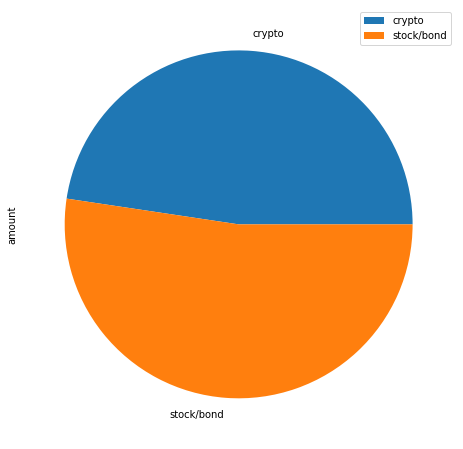

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y='amount',figsize = (15,8))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = 3* monthly_income
emergency_fund_value



36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
if total_portfolio>emergency_fund_value:
    print('congratulations for having enough money in this fund.')
elif total_portfolio == emergency_fund_value:
    print('congratulating the member on reaching this important financial goal')
else:
    print(f'You need {emergency_fund_value-total_portfolio} to reach the goal')



congratulations for having enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE
start_date_3_years = pd.Timestamp('2019-04-08',tz='America/New_York').isoformat()
end_date_3_years = pd.Timestamp('2022-04-08',tz='America/New_York').isoformat()


# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE
limit_rows = 2000


In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
prices_tickers_df_3_years = alpaca.get_bars(tickers,
                                    timeframe,
                                    limit=limit_rows,
                                    start=start_date_3_years,
                                    end=end_date_3_years
                                   ).df
display(prices_tickers_df_3_years.head())
display(prices_tickers_df_3_years.tail())
display(prices_tickers_df_3_years.shape)

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG_3_years = prices_tickers_df_3_years[prices_tickers_df_3_years['symbol']=='AGG'].drop(columns='symbol')
display(AGG_3_years.tail())
display(AGG_3_years.shape)
SPY_3_years = prices_tickers_df_3_years[prices_tickers_df_3_years['symbol']=='SPY'].drop(columns='symbol')
display(SPY_3_years.tail())
display(SPY_3_years.shape)


# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_tickers_df_3_years_concat = pd.concat([AGG_3_years,SPY_3_years],axis=1,keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(prices_tickers_df_3_years_concat.head())
display(prices_tickers_df_3_years_concat.tail())


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-04-08 04:00:00+00:00,108.39,108.4000,108.300,108.34,9485306,20805,108.341416,AGG
2019-04-09 04:00:00+00:00,108.47,108.5200,108.390,108.40,3753844,14155,108.433285,AGG
2019-04-10 04:00:00+00:00,108.55,108.6367,108.495,108.61,4682782,13735,108.559902,AGG
2019-04-11 04:00:00+00:00,108.53,108.5300,108.420,108.48,2827701,11884,108.476795,AGG
2019-04-12 04:00:00+00:00,108.26,108.3500,108.220,108.27,2430609,11376,108.269606,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-04 04:00:00+00:00,453.20,456.91,452.26,456.80,59663209,503316,455.309774,SPY
2022-04-05 04:00:00+00:00,455.23,457.83,449.82,451.03,74022189,644313,453.412462,SPY
2022-04-06 04:00:00+00:00,446.87,448.93,443.47,446.52,105592595,901634,446.345270,SPY
2022-04-07 04:00:00+00:00,445.67,450.69,443.53,448.77,77538519,628673,447.098209,SPY
2022-04-08 04:00:00+00:00,448.04,450.63,445.94,447.57,79148376,573491,448.250805,SPY


(1518, 8)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-04 04:00:00+00:00,106.87,106.870,106.560,106.84,9956493,32544,106.739298
2022-04-05 04:00:00+00:00,106.60,106.625,105.740,105.76,11018430,34684,105.931526
2022-04-06 04:00:00+00:00,105.20,105.805,105.115,105.49,13322630,47090,105.463015
2022-04-07 04:00:00+00:00,105.38,105.510,105.130,105.26,7921117,25631,105.278761
2022-04-08 04:00:00+00:00,104.82,105.010,104.615,104.73,6501822,24900,104.804999


(759, 7)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-04 04:00:00+00:00,453.20,456.91,452.26,456.80,59663209,503316,455.309774
2022-04-05 04:00:00+00:00,455.23,457.83,449.82,451.03,74022189,644313,453.412462
2022-04-06 04:00:00+00:00,446.87,448.93,443.47,446.52,105592595,901634,446.345270
2022-04-07 04:00:00+00:00,445.67,450.69,443.53,448.77,77538519,628673,447.098209
2022-04-08 04:00:00+00:00,448.04,450.63,445.94,447.57,79148376,573491,448.250805


(759, 7)

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-04-08 04:00:00+00:00  108.39  108.4000  108.300  108.34  9485306   
2019-04-09 04:00:00+00:00  108.47  108.5200  108.390  108.40  3753844   
2019-04-10 04:00:00+00:00  108.55  108.6367  108.495  108.61  4682782   
2019-04-11 04:00:00+00:00  108.53  108.5300  108.420  108.48  2827701   
2019-04-12 04:00:00+00:00  108.26  108.3500  108.220  108.27  2430609   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-04-08 04:00:00+00:00       20805  108.341416  288.10  288.9100  287.370   
2019-04-09 04:00:00+00:00       14155  108.433285  287.72  288.0800  286.700   
2019-04-10 04:00:00+00:00       13735  108.559902  287.77  288.3899  287.310   
2019-04-11 04:00:00+00:00       11884  108.476795  288.84  288.8400  287.578   
2019-04-12 04:00:00+00:00       11376  108.269606  290.01  290.4700  288.261   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-04-08 04:00:00+00:00  288.79  53726460      233825  288.325481  
2019-04-09 04:00:00+00:00  287.31  66455332      271849  287.485967  
2019-04-10 04:00:00+00:00  288.29  52754039      204506  287.884283  
2019-04-11 04:00:00+00:00  288.21  55098100      205244  288.161064  
2019-04-12 04:00:00+00:00  290.16  69835782      232166  289.776012

AGG                                      \
                             open     high      low   close    volume   
timestamp                                                               
2022-04-04 04:00:00+00:00  106.87  106.870  106.560  106.84   9956493   
2022-04-05 04:00:00+00:00  106.60  106.625  105.740  105.76  11018430   
2022-04-06 04:00:00+00:00  105.20  105.805  105.115  105.49  13322630   
2022-04-07 04:00:00+00:00  105.38  105.510  105.130  105.26   7921117   
2022-04-08 04:00:00+00:00  104.82  105.010  104.615  104.73   6501822   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-04 04:00:00+00:00       32544  106.739298  453.20  456.91  452.26   
2022-04-05 04:00:00+00:00       34684  105.931526  455.23  457.83  449.82   
2022-04-06 04:00:00+00:00       47090  105.463015  446.87  448.93  443.47   
2022-04-07 04:00:00+00:00       25631  105.278761  445.67  450.69  443.53   
2022-04-08 04:00:00+00:00       24900  104.804999  448.04  450.63  445.94   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-04-04 04:00:00+00:00  456.80   59663209      503316  455.309774  
2022-04-05 04:00:00+00:00  451.03   74022189      644313  453.412462  
2022-04-06 04:00:00+00:00  446.52  105592595      901634  446.345270  
2022-04-07 04:00:00+00:00  448.77   77538519      628673  447.098209  
2022-04-08 04:00:00+00:00  447.57   79148376      573491  448.250805

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_30_years = MCSimulation(portfolio_data=prices_tickers_df_3_years_concat,
                           weights=[0.4,0.6],
                           num_simulation=500,
                           num_trading_days=252*30
                          )

# Review the simulation input data
# YOUR CODE HERE
MC_30_years.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-04-08 04:00:00+00:00  108.39  108.4000  108.300  108.34  9485306   
2019-04-09 04:00:00+00:00  108.47  108.5200  108.390  108.40  3753844   
2019-04-10 04:00:00+00:00  108.55  108.6367  108.495  108.61  4682782   
2019-04-11 04:00:00+00:00  108.53  108.5300  108.420  108.48  2827701   
2019-04-12 04:00:00+00:00  108.26  108.3500  108.220  108.27  2430609   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-08 04:00:00+00:00       20805  108.341416          NaN  288.10   
2019-04-09 04:00:00+00:00       14155  108.433285     0.000554  287.72   
2019-04-10 04:00:00+00:00       13735  108.559902     0.001937  287.77   
2019-04-11 04:00:00+00:00       11884  108.476795    -0.001197  288.84   
2019-04-12 04:00:00+00:00       11376  108.269606    -0.001936  290.01   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-04-08 04:00:00+00:00  288.9100  287.370  288.79  53726460      233825   
2019-04-09 04:00:00+00:00  288.0800  286.700  287.31  66455332      271849   
2019-04-10 04:00:00+00:00  288.3899  287.310  288.29  52754039      204506   
2019-04-11 04:00:00+00:00  288.8400  287.578  288.21  55098100      205244   
2019-04-12 04:00:00+00:00  290.4700  288.261  290.16  69835782      232166   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-08 04:00:00+00:00  288.325481          NaN  
2019-04-09 04:00:00+00:00  287.485967    -0.005125  
2019-04-10 04:00:00+00:00  287.884283     0.003411  
2019-04-11 04:00:00+00:00  288.161064    -0.000277  
2019-04-12 04:00:00+00:00  289.776012     0.006766

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/taochen/Desktop/columbia_fintech/Challenge_5_API_MC_Simulation_Forcasting_Portfilio_Performance/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991473,0.989173,1.001815,0.981168,1.021159,0.986315,1.007609,0.990913,1.011883,1.000627,...,1.018494,0.999637,0.992699,1.009325,0.996711,1.000740,0.999690,0.982705,1.010737,1.002181
2,1.010070,0.991003,0.983536,0.998815,1.020697,0.986672,1.014385,1.004099,1.014754,0.998458,...,1.025170,1.000627,0.999713,0.998134,1.008279,0.991879,0.992907,0.981495,1.020854,0.990685
3,0.996281,0.982498,0.969551,0.995349,1.026036,0.997367,1.041227,0.992845,1.010435,1.008543,...,1.036651,0.998333,0.999403,1.002906,1.006227,0.981986,1.003803,0.976317,1.038528,1.011190
4,0.991719,1.000589,0.951731,0.990237,1.022234,0.993093,1.029339,0.998391,1.017695,1.014446,...,1.033361,0.993106,1.015993,1.010279,1.018312,0.989258,0.997128,0.970458,1.058937,1.007474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.021247,9.983234,16.838054,24.584402,23.611183,12.113784,21.991408,13.130431,27.805606,31.979161,...,12.190206,25.785162,6.428260,18.093451,13.906671,7.447148,7.568629,24.665579,40.449056,29.050740
7557,24.867993,10.040179,16.559641,24.646534,23.699220,12.128906,21.986808,13.122960,28.106124,31.950368,...,12.352699,26.215886,6.406508,18.142030,14.135752,7.341499,7.564202,24.369089,40.650727,28.953828
7558,24.598468,10.248449,16.646037,24.487358,23.683123,12.238734,22.154833,13.055936,27.903061,31.606699,...,12.294841,25.747364,6.455071,18.421940,14.058166,7.323343,7.538583,24.231124,40.443321,29.113831
7559,24.761261,9.976676,16.617277,24.722324,23.696602,12.317465,22.034942,12.964495,27.646062,31.521271,...,12.334536,25.446919,6.503508,18.223648,14.123632,7.252799,7.622966,24.287505,40.802554,29.219585


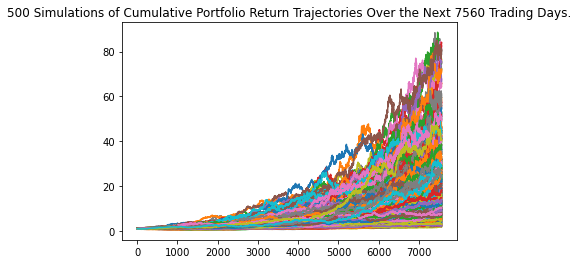

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_sim_line_plot = MC_30_years.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

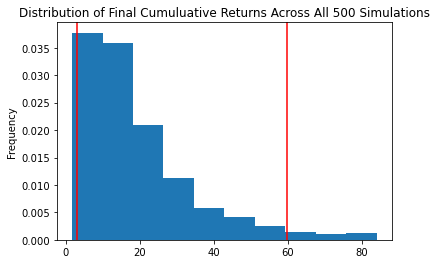

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_30_year_sim_dis_plot = MC_30_years.plot_distribution()



#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_30_years_summary_statsitics = MC_30_years.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
MC_30_years_summary_statsitics

count           500.000000
mean             19.459696
std              15.068212
min               1.794780
25%               8.833823
50%              15.094796
75%              25.160826
max              83.920359
95% CI Lower      3.049977
95% CI Upper     59.881343
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds
print(f'current balance of the stock and bond is {total_stocks_bonds}')


current balance of the stock and bond is 68794.6


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_30_years_summary_statsitics[8]*total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_30_years_summary_statsitics[9]*total_stocks_bonds

# Print the result of your calculations
display(ci_lower_thirty_cumulative_return)
display(ci_upper_thirty_cumulative_return)
print(f'the lower `95%` confidence intervals in 30 years is {ci_lower_thirty_cumulative_return}')
print(f'the upper `95%` confidence intervals in 30 years is {ci_upper_thirty_cumulative_return}')


209821.97741298616

4119513.012882162

the lower `95%` confidence intervals in 30 years is 209821.97741298616
the upper `95%` confidence intervals in 30 years is 4119513.012882162


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_10_years = MCSimulation(portfolio_data=prices_tickers_df_3_years_concat,
                           weights=[0.2,0.8],
                           num_simulation=500,
                           num_trading_days=252*10
                          )

# Review the simulation input data
# YOUR CODE HERE
MC_10_years.portfolio_data.head()

# Review the simulation input data
# YOUR CODE HERE


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-04-08 04:00:00+00:00  108.39  108.4000  108.300  108.34  9485306   
2019-04-09 04:00:00+00:00  108.47  108.5200  108.390  108.40  3753844   
2019-04-10 04:00:00+00:00  108.55  108.6367  108.495  108.61  4682782   
2019-04-11 04:00:00+00:00  108.53  108.5300  108.420  108.48  2827701   
2019-04-12 04:00:00+00:00  108.26  108.3500  108.220  108.27  2430609   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-08 04:00:00+00:00       20805  108.341416          NaN  288.10   
2019-04-09 04:00:00+00:00       14155  108.433285     0.000554  287.72   
2019-04-10 04:00:00+00:00       13735  108.559902     0.001937  287.77   
2019-04-11 04:00:00+00:00       11884  108.476795    -0.001197  288.84   
2019-04-12 04:00:00+00:00       11376  108.269606    -0.001936  290.01   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-04-08 04:00:00+00:00  288.9100  287.370  288.79  53726460      233825   
2019-04-09 04:00:00+00:00  288.0800  286.700  287.31  66455332      271849   
2019-04-10 04:00:00+00:00  288.3899  287.310  288.29  52754039      204506   
2019-04-11 04:00:00+00:00  288.8400  287.578  288.21  55098100      205244   
2019-04-12 04:00:00+00:00  290.4700  288.261  290.16  69835782      232166   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-08 04:00:00+00:00  288.325481          NaN  
2019-04-09 04:00:00+00:00  287.485967    -0.005125  
2019-04-10 04:00:00+00:00  287.884283     0.003411  
2019-04-11 04:00:00+00:00  288.161064    -0.000277  
2019-04-12 04:00:00+00:00  289.776012     0.006766

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_10_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/taochen/Desktop/columbia_fintech/Challenge_5_API_MC_Simulation_Forcasting_Portfilio_Performance/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_sim_line_plot = MC_10_years.plot_simulation()



In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_10_year_sim_dis_plot = MC_10_years.plot_distribution()



In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_10_years_summary_statsitics = MC_10_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
MC_10_years_summary_statsitics


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
# YOUR CODE HERE
total_stocks_bonds
print(f'current balance of the stock and bond is {total_stocks_bonds}')


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio


# Print the result of your calculations
# YOUR CODE HERE
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10_years_summary_statsitics[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = MC_10_years_summary_statsitics[9]*total_stocks_bonds

# Print the result of your calculations
display(ci_lower_ten_cumulative_return)
display(ci_upper_ten_cumulative_return)
print(f'the lower `95%` confidence intervals in 10 Years is {ci_lower_ten_cumulative_return}')
print(f'the upper `95%` confidence intervals in 10 year is {ci_upper_ten_cumulative_return}')


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?